In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


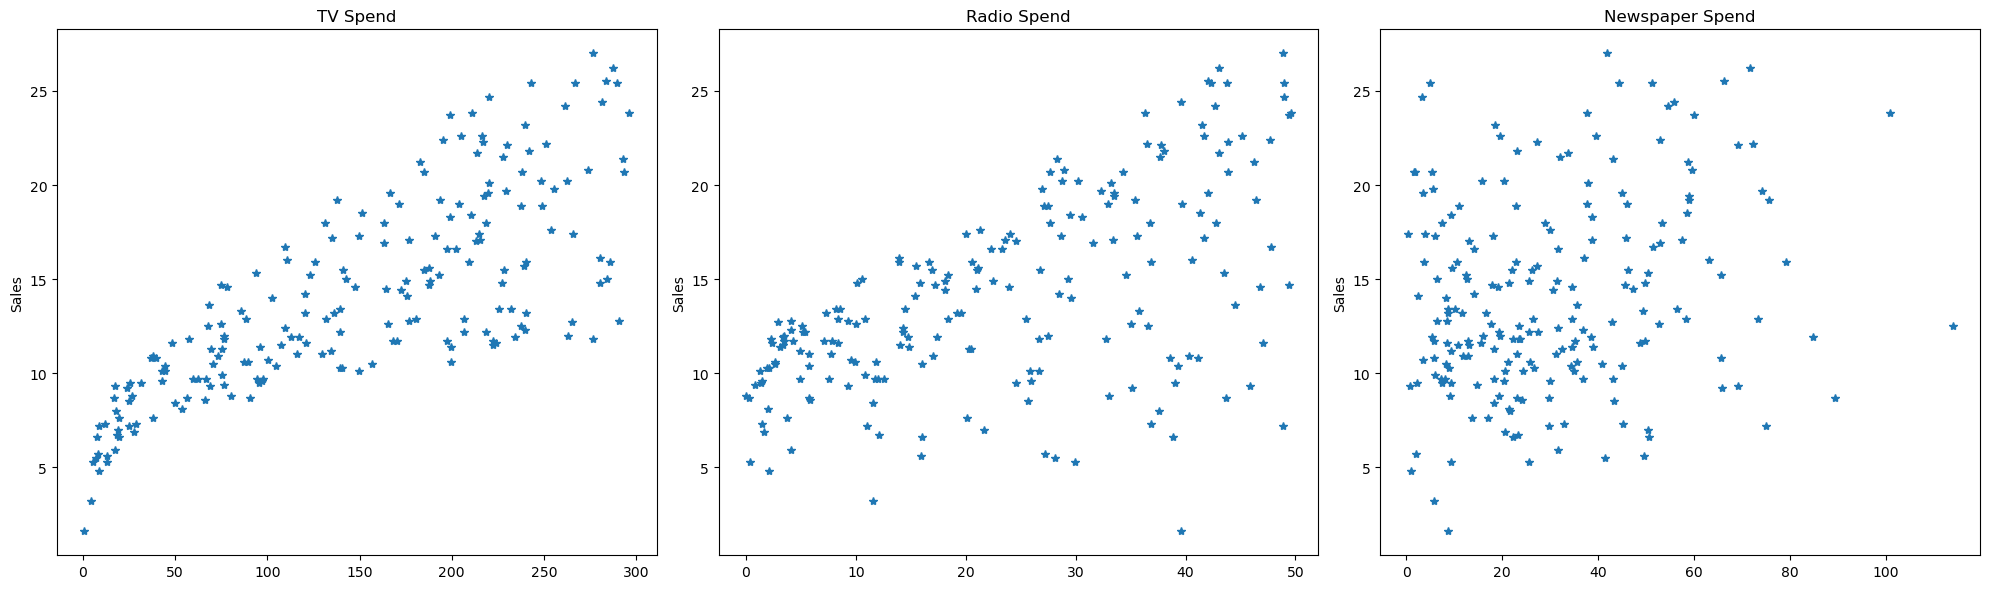

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6))

axes[0].plot(df['TV'],df['sales'],'*')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'*')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'*')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [5]:
X = df.drop('sales',axis=1)
y = df['sales']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**normalizing data**

In [7]:
scaler = StandardScaler()

In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating model

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_predict = model.predict(X_test)

In [12]:
MAE = mean_absolute_error(y_test,y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))

In [13]:
MAE

1.5116692224549084

In [14]:
RMSE

1.9485372043446387

**Errors are high so trying with regularization**

In [15]:
from sklearn.linear_model import RidgeCV

In [16]:
#Checking with different alpha value to get best alpha
# Negative RMSE so all metrics follow convention "Higher is better"
ridge_cv_model = RidgeCV(alphas=(0.001, 0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [17]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-03, 1.e-01, 1.e+00, 1.e+01]),
        scoring='neg_mean_absolute_error')

In [18]:
#best alpha value which performs well in accuracy
ridge_cv_model.alpha_

0.001

In [19]:
y_predict_1 = ridge_cv_model.predict(X_test)

In [20]:
MAE_1 = mean_absolute_error(y_test,y_predict_1)
MAE_1

1.5116677645565533

In [21]:
RMSE_1 = np.sqrt(mean_squared_error(y_test,y_predict_1))
RMSE_1

1.9485377871492697

**Accuracy is almost same even after regularization so directly use simple linear regression**

In [22]:
final_model = LinearRegression()

In [23]:
final_model.fit(X,y)

LinearRegression()

**Predicting sales**

In [24]:
example = [[44.5,39.3,45.1]]

In [25]:
final_model.predict(example)

C:\Users\Shubham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.33785482])